# MPMS Results on 2022-06-06 DA4-A
FC-ZFC-RT-SIRM

Frequency dependency of Xusceptibility

DA4-A-FC-ZFC-RT-SIRM-AC_sweep.dat -- data file

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math

In [2]:
##Sample mass in kg
mass = 0.188*0.001

In [3]:
## Frequency values 
freqs = [1.000576 , 5.316651 , 28.257017, 150.471878, 800.461121]


In [4]:
## Row numbers 
m_start = 47
FC_start = 47
ZFC_start = 337
RT_SIRM_cool_start = 627
RT_SIRM_warm_start = 863
X_start = 1156
X_end = 1450

n_freq = 5 ##number of different frequencies used

In [5]:
##Attempt no1 to not have to hard code in row shift

#start_numbers =  [FC_start, ZFC_start, RT_SIRM_cool_start, RT_SIRM_warm_start, X_start]
#for start_number in start_numbers:
#    start_number = start_number - 47
#    print(start_number)


In [6]:
##Attempt no2 to not have to hard code in row shift

##row_numbers = pd.DataFrame([47, 47, 337, 627, 863, 1156], ['m_start', 'FC_start', 'ZFC_start', 'RT_SIRM_cool_start', 'RT_SIRM_warm_start','X_start'], ['excel_number'])
##row_numbers['df_number'] = row_numbers['excel_number'] - 47
##row_numbers
##row_numbers.iat[2,0]

In [7]:
pwd ##check we are in the same place as the data


'C:\\Users\\murray98\\Documents\\IRM summer school'

In [8]:
##Read in data
df = pd.read_csv('DA4-A-FC-ZFC-RT-SIRM-AC_sweep.dat', 
                 sep=",", 
                 skiprows=44 )
print(df)

      Comment  Time Stamp (sec)  Temperature (K)  Magnetic Field (Oe)  \
0         NaN      3.863176e+09        10.000184            25.321844   
1         NaN      3.863176e+09        10.198153            25.321844   
2         NaN      3.863176e+09        11.069465            25.321844   
3         NaN      3.863176e+09        12.107268            25.321844   
4         NaN      3.863176e+09        13.008427            25.321844   
...       ...               ...              ...                  ...   
1399      NaN      3.863217e+09       299.973099            25.371988   
1400      NaN      3.863217e+09       300.003128            25.371988   
1401      NaN      3.863217e+09       300.002243            25.371988   
1402      NaN      3.863217e+09       299.998413            25.371988   
1403      NaN      3.863217e+09       299.997940            25.371988   

      Moment (emu)  M. Std. Err. (emu)  Transport Action  \
0         0.001691        1.130237e-07                 1   
1  

In [9]:
df['Moment (Am2/kg)'] = df['Moment (emu)'] /(1000*mass)

In [10]:
d = 47 

FC_data = df.loc[FC_start -d : ZFC_start-d-1, ['Temperature (K)','Moment (Am2/kg)']]
print(FC_data)
ZFC_data = df.loc[ZFC_start-d : RT_SIRM_cool_start-d-1, ['Temperature (K)','Moment (Am2/kg)']]
print(ZFC_data)

RT_SIRM_cool_data = df.loc[RT_SIRM_cool_start-d : RT_SIRM_warm_start-d-1, ['Temperature (K)','Moment (Am2/kg)']]

RT_SIRM_warm_data = df.loc[RT_SIRM_warm_start-d : X_start-d-1, ['Temperature (K)','Moment (Am2/kg)']]



     Temperature (K)  Moment (Am2/kg)
0          10.000184         0.008993
1          10.198153         0.008987
2          11.069465         0.008974
3          12.107268         0.008932
4          13.008427         0.008840
..               ...              ...
285       296.016510         0.001821
286       297.057129         0.001821
287       298.124817         0.001820
288       299.006866         0.001819
289       299.943756         0.001820

[290 rows x 2 columns]
     Temperature (K)  Moment (Am2/kg)
290        10.000038         0.007988
291        10.099554         0.007985
292        11.000334         0.007979
293        12.036589         0.007956
294        13.139777         0.007899
..               ...              ...
575       296.063965         0.001836
576       297.144562         0.001836
577       298.014435         0.001835
578       299.002380         0.001834
579       299.944336         0.001834

[290 rows x 2 columns]


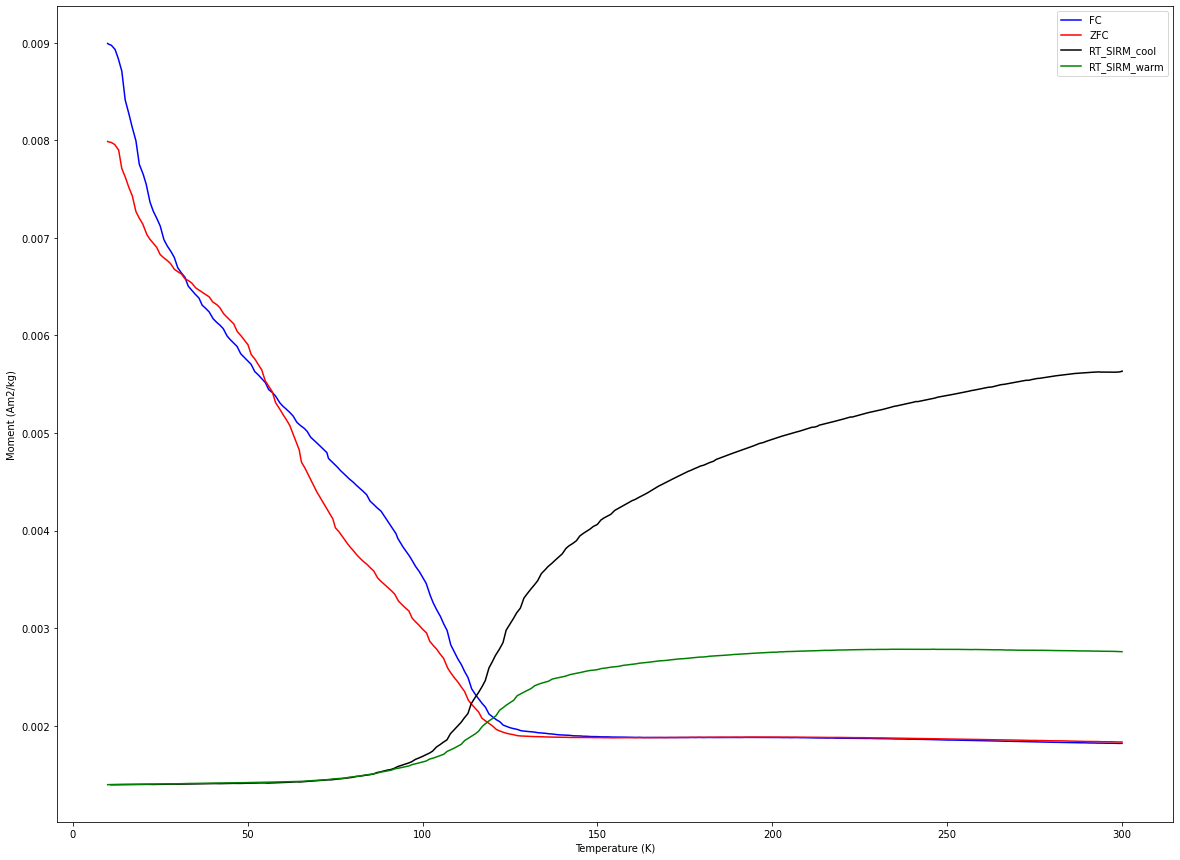

In [11]:
fig,ax = plt.subplots(figsize=(15,15))


ax.plot(FC_data["Temperature (K)"] , FC_data['Moment (Am2/kg)'], label = 'FC', color = 'blue')
ax.plot(ZFC_data["Temperature (K)"] , ZFC_data['Moment (Am2/kg)'], label = 'ZFC', color = 'red')
ax.plot(RT_SIRM_cool_data["Temperature (K)"] , RT_SIRM_cool_data['Moment (Am2/kg)'], label = 'RT_SIRM_cool', color='black')
ax.plot(RT_SIRM_warm_data["Temperature (K)"] , RT_SIRM_warm_data['Moment (Am2/kg)'], label = 'RT_SIRM_warm', color='green')

ax.set_xlabel('Temperature (K)')
ax.set_ylabel('Moment (Am2/kg)')

ax.legend()


##Observations

FC starts above ZFC (0.009 vs 0.008 Am2/kg) 

Both drop steeply from 0K to 120K 

ZFC changes slope at 30K, shallows then steeper drop at 60K, shallows at 100K 

These temperatures can be quantified by taking derivatives from the slopes. 

RT_SIRM_cool is much higher than the RT_SIRM_warm at high temperatures (above 90K) 
RT_SIRM_warm flattens off 


## Frequency dependence of AC susceptibility 

In [12]:
##Split out section for freq dependence of AC susceptibility
X_data = df.loc[(X_start - m_start):, ['Temperature (K)','AC Susceptibility (emu/Oe)', 'AC Frequency (Hz)']]
print(X_data)

      Temperature (K)  AC Susceptibility (emu/Oe)  AC Frequency (Hz)
1109         9.999393                    0.000009           1.000576
1110         9.999243                    0.000009           5.316651
1111         9.999965                    0.000009          28.257017
1112         9.999737                    0.000009         150.471878
1113        10.000081                    0.000010         800.461121
...               ...                         ...                ...
1399       299.973099                    0.000014           1.000576
1400       300.003128                    0.000014           5.316651
1401       300.002243                    0.000014          28.257017
1402       299.998413                    0.000014         150.471878
1403       299.997940                    0.000014         800.461121

[295 rows x 3 columns]


In [13]:
##Make my life 4 letters easier
pi = math.pi
pi

3.141592653589793

In [14]:
## Convert from CGS to SI and normalise by mass
X_data['AC Susceptibility (m3/kg)'] = X_data['AC Susceptibility (emu/Oe)'] * 4 * pi * 1e-6 /mass
X_data.head

<bound method NDFrame.head of       Temperature (K)  AC Susceptibility (emu/Oe)  AC Frequency (Hz)  \
1109         9.999393                    0.000009           1.000576   
1110         9.999243                    0.000009           5.316651   
1111         9.999965                    0.000009          28.257017   
1112         9.999737                    0.000009         150.471878   
1113        10.000081                    0.000010         800.461121   
...               ...                         ...                ...   
1399       299.973099                    0.000014           1.000576   
1400       300.003128                    0.000014           5.316651   
1401       300.002243                    0.000014          28.257017   
1402       299.998413                    0.000014         150.471878   
1403       299.997940                    0.000014         800.461121   

      AC Susceptibility (m3/kg)  
1109               6.320719e-07  
1110               6.296038e-07  
111

<AxesSubplot:xlabel='Temperature (K)', ylabel='AC Susceptibility (m3/kg)'>

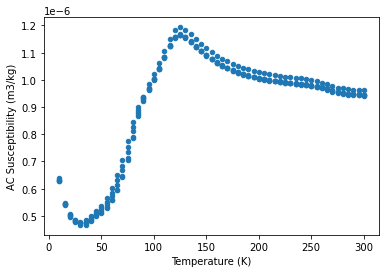

In [15]:
##Plot all data together
X_data.plot.scatter(x="Temperature (K)", y='AC Susceptibility (m3/kg)')

In [16]:
##Neater way of doing the same thing as below to split the data by frequency, unfinished

##freqs = [2, 6, 29, 151, 801]
##i=0
##for freq in freqs:
  ##  mask = X_data['AC Frequency (Hz)'] <= freq
  ##  X_freq = X_data[mask]
  ##  X_freq_rest = X_freq[~mask]
  ##  print(X_freq)

In [17]:
mask = X_data['AC Frequency (Hz)'] <= 2
X_freq1 = X_data[mask]
print(X_freq1)

X_freq_1 = X_data[~mask]
print (X_freq_1)

      Temperature (K)  AC Susceptibility (emu/Oe)  AC Frequency (Hz)  \
1109         9.999393                    0.000009           1.000576   
1114        14.999485                    0.000008           1.000576   
1119        20.000397                    0.000008           1.000576   
1124        24.999952                    0.000007           1.000576   
1129        30.000074                    0.000007           1.000576   
1134        34.999887                    0.000007           1.000576   
1139        39.999947                    0.000007           1.000576   
1144        44.999956                    0.000008           1.000576   
1149        49.999949                    0.000008           1.000576   
1154        54.999310                    0.000008           1.000576   
1159        59.999313                    0.000009           1.000576   
1164        64.999447                    0.000010           1.000576   
1169        69.998486                    0.000011           1.00

In [18]:
mask2 = (X_data['AC Frequency (Hz)'] < 6) 
X_freq2 = X_freq_1[mask2]
print(X_freq2)
X_freq_2 = X_freq_1[~mask2]
print(X_freq_2)

      Temperature (K)  AC Susceptibility (emu/Oe)  AC Frequency (Hz)  \
1110         9.999243                    0.000009           5.316651   
1115        14.998917                    0.000008           5.316651   
1120        20.000090                    0.000008           5.316651   
1125        25.000042                    0.000007           5.316651   
1130        30.000223                    0.000007           5.316651   
1135        34.999939                    0.000007           5.316651   
1140        39.999882                    0.000007           5.316651   
1145        45.000053                    0.000008           5.316651   
1150        50.000185                    0.000008           5.316651   
1155        54.999859                    0.000008           5.316651   
1160        59.999830                    0.000009           5.316651   
1165        64.999680                    0.000009           5.316651   
1170        69.999649                    0.000010           5.31

C:\Users\murray98\AppData\Local\Temp/ipykernel_1620/761478566.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_freq2 = X_freq_1[mask2]
C:\Users\murray98\AppData\Local\Temp/ipykernel_1620/761478566.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_freq_2 = X_freq_1[~mask2]


In [19]:
mask3 = (X_data['AC Frequency (Hz)'] < 29) 
X_freq3 = X_freq_2[mask3]
print(X_freq3)
X_freq_3 = X_freq_2[~mask3]
print(X_freq_3)

      Temperature (K)  AC Susceptibility (emu/Oe)  AC Frequency (Hz)  \
1111         9.999965                    0.000009          28.257017   
1116        14.999382                    0.000008          28.257017   
1121        19.999966                    0.000007          28.257017   
1126        25.000160                    0.000007          28.257017   
1131        29.999947                    0.000007          28.257017   
1136        34.999807                    0.000007          28.257017   
1141        39.999807                    0.000007          28.257017   
1146        44.999868                    0.000008          28.257017   
1151        49.999958                    0.000008          28.257017   
1156        55.000095                    0.000008          28.257017   
1161        59.999929                    0.000009          28.257017   
1166        64.999683                    0.000009          28.257017   
1171        69.999828                    0.000010          28.25

C:\Users\murray98\AppData\Local\Temp/ipykernel_1620/1437711126.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_freq3 = X_freq_2[mask3]
C:\Users\murray98\AppData\Local\Temp/ipykernel_1620/1437711126.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_freq_3 = X_freq_2[~mask3]


In [20]:
mask4 = (X_data['AC Frequency (Hz)'] < 151) 
X_freq4 = X_freq_3[mask4]
print(X_freq4)
X_freq_4 = X_freq_3[~mask4]
print(X_freq_4)

      Temperature (K)  AC Susceptibility (emu/Oe)  AC Frequency (Hz)  \
1112         9.999737                    0.000009         150.471878   
1117        14.999636                    0.000008         150.471878   
1122        20.000165                    0.000007         150.471878   
1127        25.000054                    0.000007         150.471878   
1132        29.999921                    0.000007         150.471878   
1137        34.999912                    0.000007         150.471878   
1142        39.999929                    0.000007         150.471878   
1147        44.999748                    0.000007         150.471878   
1152        50.000137                    0.000008         150.471878   
1157        54.999794                    0.000008         150.471878   
1162        59.999907                    0.000008         150.471878   
1167        64.999817                    0.000009         150.471878   
1172        70.000042                    0.000010         150.47

C:\Users\murray98\AppData\Local\Temp/ipykernel_1620/917066394.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_freq4 = X_freq_3[mask4]
C:\Users\murray98\AppData\Local\Temp/ipykernel_1620/917066394.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_freq_4 = X_freq_3[~mask4]


In [21]:
X_freq5 = X_freq_4
print(X_freq5)

      Temperature (K)  AC Susceptibility (emu/Oe)  AC Frequency (Hz)  \
1113        10.000081                    0.000010         800.461121   
1118        14.999895                    0.000008         800.461121   
1123        19.999870                    0.000008         800.461121   
1128        25.001484                    0.000007         800.461121   
1133        29.999855                    0.000007         800.461121   
1138        34.999933                    0.000007         800.461121   
1143        40.000015                    0.000007         800.461121   
1148        44.999937                    0.000008         800.461121   
1153        49.999989                    0.000008         800.461121   
1158        54.999649                    0.000008         800.461121   
1163        59.999891                    0.000008         800.461121   
1168        64.999954                    0.000009         800.461121   
1173        69.999939                    0.000010         800.46

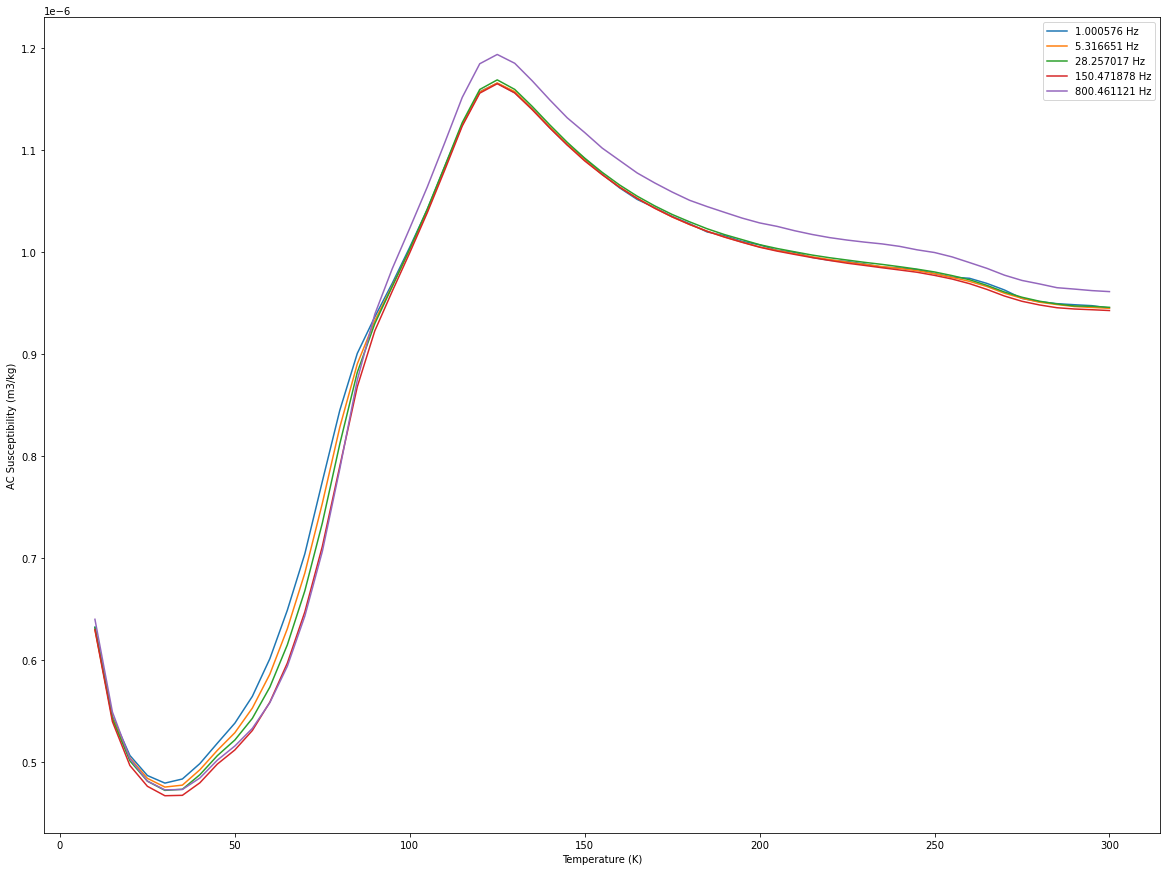

In [22]:
fig,ax = plt.subplots(figsize=(10,10))


ax.plot(X_freq1["Temperature (K)"] , X_freq1['AC Susceptibility (m3/kg)'], label = f'{freqs[0]} Hz')
ax.plot(X_freq2["Temperature (K)"] , X_freq2['AC Susceptibility (m3/kg)'], label = f'{freqs[1]} Hz')
ax.plot(X_freq3["Temperature (K)"] , X_freq3['AC Susceptibility (m3/kg)'], label = f'{freqs[2]} Hz')
ax.plot(X_freq4["Temperature (K)"] , X_freq4['AC Susceptibility (m3/kg)'], label = f'{freqs[3]} Hz')
ax.plot(X_freq5["Temperature (K)"] , X_freq5['AC Susceptibility (m3/kg)'], label = f'{freqs[4]} Hz')

ax.set_xlabel('Temperature (K)')
ax.set_ylabel('AC Susceptibility (m3/kg)')

ax.legend()


##Observations 

NOTE: 800Hz freq has measured incorrectly

All curves: steep drop down to 40K increases to 120K slow drop to 300K 
At all T, susceptibility is lower for higher frequencies - check this is true for all sections of the graph.

